___

In [1]:
# Import libraries to be used

# Warning messages display
# import warnings
# warnings.filterwarnings(action='once') # https://docs.python.org/3/library/warnings.html#the-warnings-filter

# Directories/Files management
import os.path
## from zipfile import ZipFile # De momento no ha hecho falta 

# Timing
import time

# Data analysis and wrangling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Show all columns in DataFrames
pd.set_option('display.max_rows', 100) # If too high, it greatly slows down the output display and freezes the kernel


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot') # choose a style: 'plt.style.available'
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}
palette = sns.color_palette("flare", as_cmap=True);
import altair as alt

# Machine Learning
## from sklearn.[...] import ...

In [2]:
%load_ext memory_profiler

In [3]:
t0 = time.perf_counter() 

In [4]:
# Detect Operating System running and manage paths accordingly

if os.name == 'nt': # Windows
    root = r"C:\Users\turge\CompartidoVM\0.TFM"
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    root = "/home/dsc/shared/0.TFM"
    print("Running on Ubuntu.")
print("root path\t", root)

Running on Windows.
root path	 C:\Users\turge\CompartidoVM\0.TFM


___

In [5]:
cols = [
     'MONTH',
     'DAY_OF_MONTH',
     'DAY_OF_WEEK',
     'OP_UNIQUE_CARRIER',
# For the time being, 'TAIL_NUM' will be disregarded due to its high cardinality  (~ 4500) and low expected added value    
#      'TAIL_NUM',
     'ORIGIN',
     'DEST',
#      'CRS_DEP_TIME', # Redundant having the 'DEP_ARR_hour' feature
     'DEP_TIME_hour',
#      'DEP_TIME',
#      'DEP_DELAY',
#      'DEP_DEL15',
#      'TAXI_OUT',
     'TAXI_OUT_median',
#      'TAXI_IN',
     'TAXI_IN_median',
#      'CRS_ARR_TIME', # Redundant having the 'ARR_ARR_hour' feature
     'ARR_TIME_hour', 
#      'ARR_TIME',   
#      'ARR_DELAY',
     'ARR_DEL15', # → Target !!
#      'CANCELLED',
     'CRS_ELAPSED_TIME',
     'DISTANCE',
     'DISTANCE_GROUP',
#      'CARRIER_DELAY',
#      'WEATHER_DELAY',
#      'NAS_DELAY',
#      'SECURITY_DELAY',
#      'LATE_AIRCRAFT_DELAY',
]

In [6]:
preprocessed_input_csv_path = os.path.join(root,
                                           "Output_Data",
                                           "US_DoT",
                                           "AL_OTP_MVP_Preprocessed_19_v2_clean.csv")
preprocessed_input_csv_path

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\US_DoT\\AL_OTP_MVP_Preprocessed_19_v2_clean.csv'

In [7]:
cols_dtypes = {
               'MONTH' : 'category',
               'DAY_OF_MONTH' : 'category',
               'DAY_OF_WEEK' : 'category',
               'OP_UNIQUE_CARRIER' : 'category',
               'ORIGIN' : 'category',
               'DEST' : 'category',
               'DEP_TIME_hour' : 'category',
               'TAXI_OUT_median' : 'int64',
               'TAXI_IN_median' : 'int64',
               'ARR_TIME_hour' : 'category', 
               'ARR_DEL15' : 'int32', # → Target !!
               'CRS_ELAPSED_TIME' : 'int64',
               'DISTANCE' : 'int64',
               'DISTANCE_GROUP' : 'category'
               }

In [8]:
%%time

df_all = pd.read_csv(preprocessed_input_csv_path,
                     encoding='latin1',
                     usecols=cols,
                     low_memory = False)

Wall time: 19.4 s


In [9]:
# Cast types in accordance to previously defined dictionary:
df_all = df_all.astype(cols_dtypes)
# Display DF columns according to 'cols' order:
df_all = df_all[cols]
df_all

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_hour,TAXI_OUT_median,TAXI_IN_median,ARR_TIME_hour,ARR_DEL15,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP
0,1,3,4,9E,TYS,ATL,11,15,8,12,1,70,152,1
1,1,4,5,9E,TYS,ATL,11,15,8,12,1,70,152,1
2,1,5,6,9E,ATL,SGF,9,17,5,10,0,121,563,3
3,1,6,7,9E,ATL,SGF,9,17,5,10,0,123,563,3
4,1,7,1,9E,ATL,SGF,9,17,5,10,0,123,563,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7268227,12,31,2,B6,MCO,SWF,13,15,6,16,1,163,989,4
7268228,12,31,2,B6,DCA,BOS,14,15,6,15,0,90,399,2
7268229,12,31,2,B6,PHL,BOS,7,17,6,8,0,85,280,2
7268230,12,31,2,B6,BOS,SJU,8,16,5,13,0,242,1674,7


In [10]:
df_all.shape

(7268232, 14)

In [11]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7268232 entries, 0 to 7268231
Data columns (total 14 columns):
 #   Column             Dtype   
---  ------             -----   
 0   MONTH              category
 1   DAY_OF_MONTH       category
 2   DAY_OF_WEEK        category
 3   OP_UNIQUE_CARRIER  category
 4   ORIGIN             category
 5   DEST               category
 6   DEP_TIME_hour      category
 7   TAXI_OUT_median    int64   
 8   TAXI_IN_median     int64   
 9   ARR_TIME_hour      category
 10  ARR_DEL15          int32   
 11  CRS_ELAPSED_TIME   int64   
 12  DISTANCE           int64   
 13  DISTANCE_GROUP     category
dtypes: category(9), int32(1), int64(4)
memory usage: 325.8 MB


In [12]:
sample_length = int(1e4)
delayed = df_all[df_all['ARR_DEL15'] == 1].sample(sample_length // 2)
ontime = df_all[df_all['ARR_DEL15'] == 0].sample(sample_length // 2)
df = delayed.append(ontime)

df_validation = df_all.loc[set(df_all.index) - set(df.index), :]

df.shape, df_validation.shape

((10000, 14), (7258232, 14))

### Feature analysis

[Dealing with categorical features with high cardinality: Target Encoding](https://medium.com/@kr.vishwesh54/dealing-with-categorical-features-with-high-cardinality-target-encoding-baa9298bf257)

In [13]:
X = df.drop('ARR_DEL15', axis=1)
X.sample(5)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,ORIGIN,DEST,DEP_TIME_hour,TAXI_OUT_median,TAXI_IN_median,ARR_TIME_hour,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP
3495490,6,11,2,DL,SLC,STL,20,16,5,23,164,1156,5
5423767,10,8,2,DL,ATL,OMA,21,15,4,23,144,821,4
443953,1,25,5,OO,LAX,SFO,12,19,5,13,94,337,2
2787158,5,7,2,OO,LGA,GSO,9,23,5,11,115,461,2
1192770,3,8,5,UA,DCA,ORD,16,15,11,18,136,612,3


In [14]:
y = df['ARR_DEL15']
y.sample(5)

4376071    1
2812567    0
7054722    1
4184941    1
3357794    0
Name: ARR_DEL15, dtype: int32

In [15]:
def val_freq(col='', df=df):
    i = 0
    for v in df[col].value_counts().sort_index():
        print("{} : {} records ({:.2f}%)" \
              .format(df[col].value_counts().sort_index().index[i], v,  v / len(df) * 100))
        i += 1

In [16]:
%%time

for col in df.columns:
    print(col, ':', df[col].nunique(), 'unique values')
    if df[col].nunique() < 50:
        val_freq(col)
    print("")

MONTH : 12 unique values
1 : 752 records (7.52%)
2 : 751 records (7.51%)
3 : 866 records (8.66%)
4 : 821 records (8.21%)
5 : 837 records (8.37%)
6 : 936 records (9.36%)
7 : 851 records (8.51%)
8 : 913 records (9.13%)
9 : 806 records (8.06%)
10 : 853 records (8.53%)
11 : 747 records (7.47%)
12 : 867 records (8.67%)

DAY_OF_MONTH : 31 unique values
1 : 346 records (3.46%)
2 : 344 records (3.44%)
3 : 306 records (3.06%)
4 : 306 records (3.06%)
5 : 304 records (3.04%)
6 : 323 records (3.23%)
7 : 335 records (3.35%)
8 : 287 records (2.87%)
9 : 312 records (3.12%)
10 : 374 records (3.74%)
11 : 357 records (3.57%)
12 : 359 records (3.59%)
13 : 340 records (3.40%)
14 : 294 records (2.94%)
15 : 338 records (3.38%)
16 : 320 records (3.20%)
17 : 322 records (3.22%)
18 : 391 records (3.91%)
19 : 323 records (3.23%)
20 : 351 records (3.51%)
21 : 345 records (3.45%)
22 : 332 records (3.32%)
23 : 317 records (3.17%)
24 : 340 records (3.40%)
25 : 325 records (3.25%)
26 : 303 records (3.03%)
27 : 347 r

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


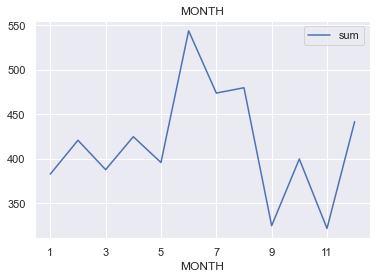

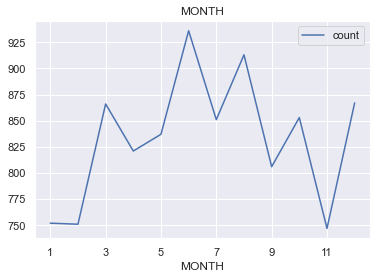

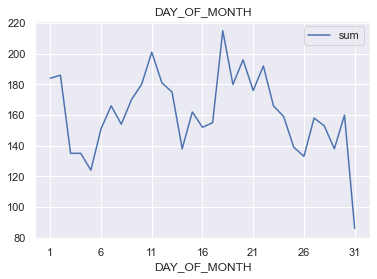

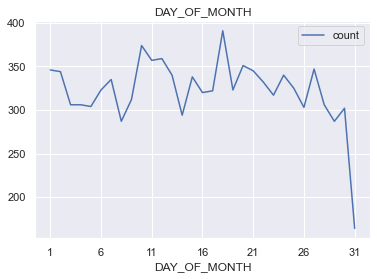

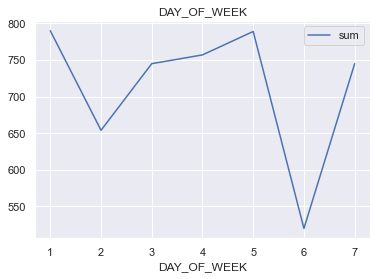

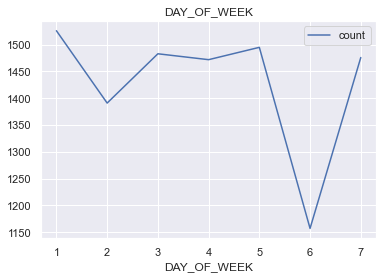

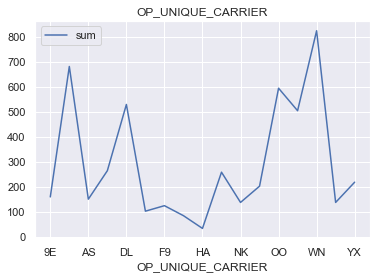

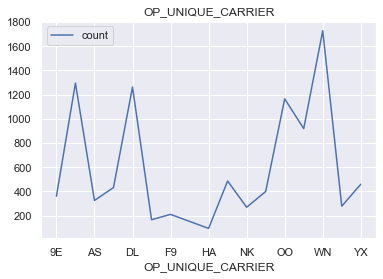

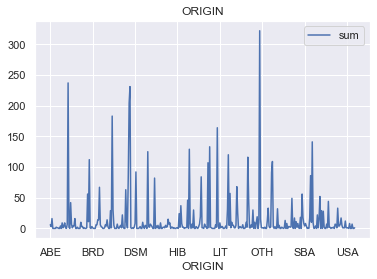

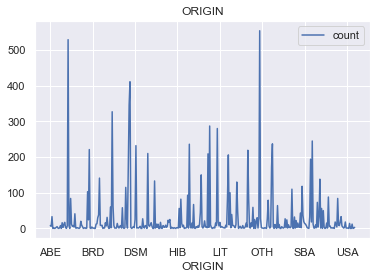

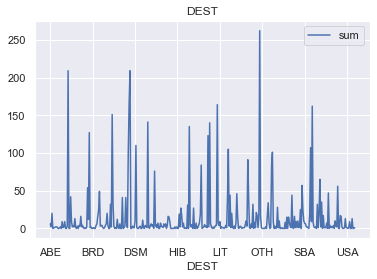

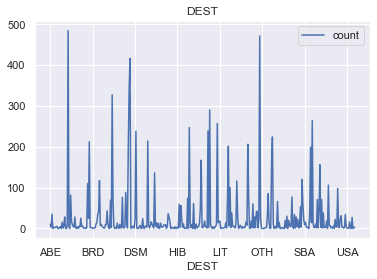

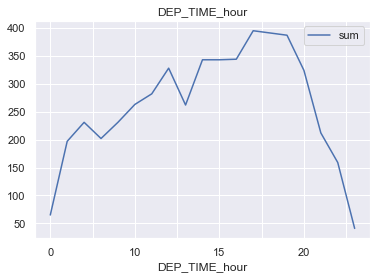

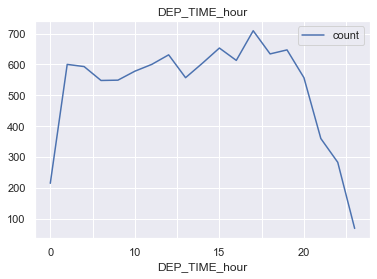

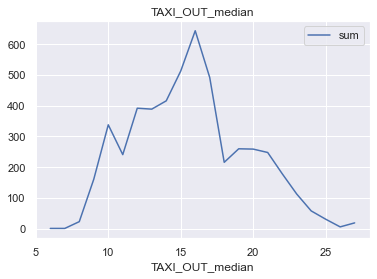

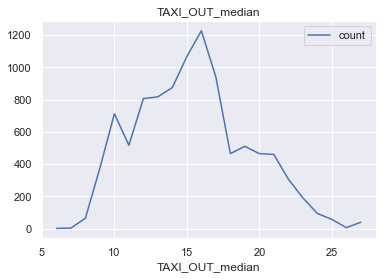

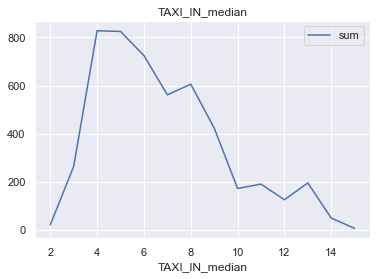

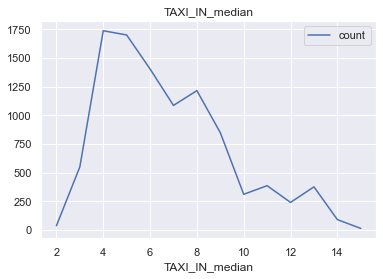

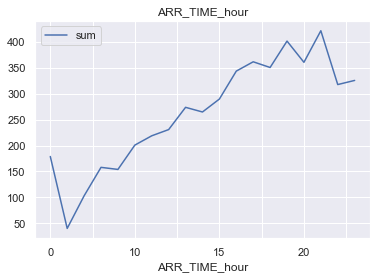

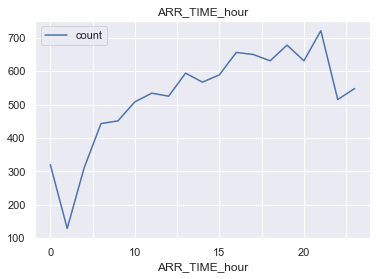

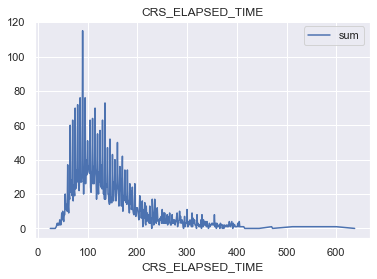

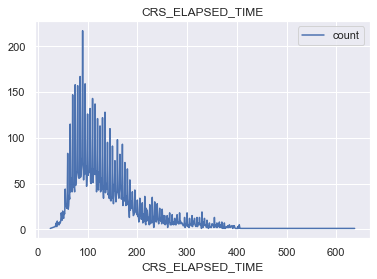

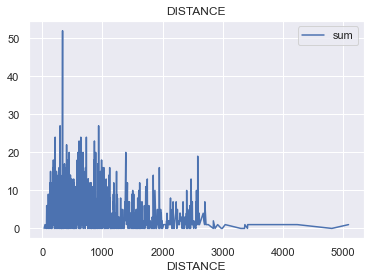

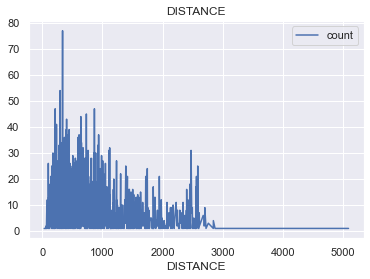

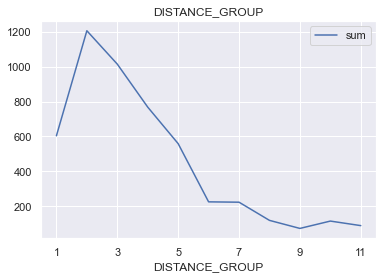

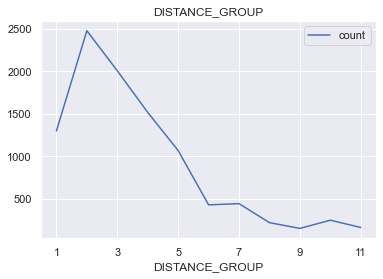

In [17]:
for col in X.columns:
    a = df.groupby([col], as_index=False).agg(['sum'])['ARR_DEL15']
    a.plot(legend=True)
    plt.title(col)
    b = df.groupby([col], as_index=False).agg(['count'])['ARR_DEL15']
    b.plot(legend=True)
    plt.title(col)

Conclusiones:
- En junio se concentra el mayor número de retrasos.
- Los D y X se concentra el mayor número de retrasos (especialmente X). D y X es cuando más vuelos hay con diferencia.

___

In [18]:
%memit

peak memory: 916.39 MiB, increment: -0.14 MiB


### A Simple Guide to Scikit-learn Pipelines

#### Transformers

Before building the pipeline, let's split the data into a train and test set so that the performance of the model can be validated.

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

1. The first step in building the pipeline is to define each transformer type.

In [20]:
%%time

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

Wall time: 198 ms


2. Next, let's use the ColumnTransformer to apply the transformations to the correct columns in the dataframe. Before building this, the numeric and categorical columns shall be listed.

In [21]:
%%time

numeric_features = df.select_dtypes(include=['number']).drop(['ARR_DEL15'], axis=1).columns
categorical_features = df.select_dtypes(include=['category']).columns
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

Wall time: 41 ms


#### Fitting the classifier

The next step is to create a pipeline that combines the preprocessor created above with a classifier. In this case a simple RandomForestClassifier has been used to start with.

In [22]:
%%time

from sklearn.ensemble import RandomForestClassifier

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=0))])

clf.fit(X_train, y_train)
clf.score(X_test, y_test)

# from sklearn.metrics import fbeta_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score, \
#                             confusion_matrix, plot_confusion_matrix

# predictions = clf.predict(X_test)
# probabilities = clf.predict_proba(X_test)

# print(fbeta_score(y_test, predictions, beta=2), f1_score(y_test, predictions), \
#       recall_score(y_test, predictions), precision_score(y_test, predictions), \
#       accuracy_score(y_test, predictions))
# print(confusion_matrix(y_test, predictions))

# tpr, fpr, thresolds = roc_curve(y_test, probabilities[:, 1])
# plt.plot(tpr, fpr)
# plt.plot([0, 1], [0, 1], color='0.3', linestyle='dashed')
# plot_confusion_matrix(clf, X_test, y_test, display_labels=['on-time', 'delayed'])

Wall time: 6.03 s


0.587

#### Model selection

**A pipeline can also be used during the model selection process**. The following example code loops through a number of scikit-learn classifiers applying the transformations and training the model.

In [26]:
def clf_metrics(classifier, y_test, predictions):
    print(classifier)
    print("F-beta (ß=2) = {:6.3f}".format(fbeta_score(y_test, predictions, beta=2)))   
    print("F1 =           {:6.3f}".format(f1_score(y_test, predictions)))   
    print("Recall =       {:6.3f}".format(recall_score(y_test, predictions)))   
    print("Precision =    {:6.3f}".format(precision_score(y_test, predictions)))   
    print("Accuracy =     {:6.3f}".format(accuracy_score(y_test, predictions)))
    print(confusion_matrix(y_test, predictions))

In [59]:
%%time

from sklearn.metrics import fbeta_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score, \
                            confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

classifiers = [
    LogisticRegression(solver='sag', max_iter=1000, random_state=0),
#     GaussianNB(),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True, random_state=0), # TARDA MUCHÍSIMO MÁS!!
#     SVC(kernel="linear", C=0.025, probability=True, random_state=0),
#     LinearSVC(C=0.025, kernel='linear', probability=True, dual=False, random_state=0),
# "The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples 
# and may be impractical beyond tens of thousands of samples. For large datasets consider using LinearSVC or
# SGDClassifier instead."
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(random_state=0),
    AdaBoostClassifier(random_state=0),
    GradientBoostingClassifier(random_state=0)
    ]

# Define the result table as a DataFrame:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

for classifier in classifiers:
    t0_clf = time.perf_counter() 
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', classifier)])
    pipe.fit(X_train, y_train)
    predictions = pipe.predict(X_test)
    probabilities = pipe.predict_proba(X_test)
    
    # Print metrics:
    clf_metrics(classifier, y_test, predictions)
    fpr, tpr, _ = roc_curve(y_test,  probabilities[::,1])
    auc = roc_auc_score(y_test, probabilities[::,1])
    result_table = result_table.append({'classifiers':classifier.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)    
    t1_clf = time.perf_counter() - t0_clf
    print("time elapsed: {:7.1f} s\n".format(t1_clf))

# # Set the name of the classifiers as the index labels:
# result_table.set_index('classifiers', inplace=True)

LogisticRegression(max_iter=1000, random_state=0, solver='sag')
F-beta (ß=2) =  0.602
F1 =            0.590
Recall =        0.610
Precision =     0.572
Accuracy =      0.582
[[560 452]
 [385 603]]
time elapsed:     0.5 s

KNeighborsClassifier(n_neighbors=3)
F-beta (ß=2) =  0.531
F1 =            0.527
Recall =        0.533
Precision =     0.521
Accuracy =      0.527
[[528 484]
 [461 527]]
time elapsed:     1.4 s

SVC(C=0.025, probability=True, random_state=0)
F-beta (ß=2) =  0.739
F1 =            0.642
Recall =        0.823
Precision =     0.526
Accuracy =      0.546
[[280 732]
 [175 813]]
time elapsed:    41.3 s

DecisionTreeClassifier(random_state=0)
F-beta (ß=2) =  0.550
F1 =            0.545
Recall =        0.553
Precision =     0.537
Accuracy =      0.544
[[542 470]
 [442 546]]
time elapsed:     0.8 s

RandomForestClassifier(random_state=0)
F-beta (ß=2) =  0.579
F1 =            0.580
Recall =        0.578
Precision =     0.583
Accuracy =      0.587
[[603 409]
 [417 571]]
time elaps

In [60]:
result_table

,classifiers,fpr,tpr,auc
0,LogisticRegression,"[0.0, 0.0, 0.0009881422924901185, 0.0009881422...","[0.0, 0.0010121457489878543, 0.001012145748987...",0.610407
1,KNeighborsClassifier,"[0.0, 0.12648221343873517, 0.4782608695652174,...","[0.0, 0.14271255060728744, 0.5334008097165992,...",0.536434
2,SVC,"[0.0, 0.0009881422924901185, 0.000988142292490...","[0.0, 0.0, 0.0010121457489878543, 0.0010121457...",0.606886
3,DecisionTreeClassifier,"[0.0, 0.4644268774703557, 1.0]","[0.0, 0.5526315789473685, 1.0]",0.544102
4,RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0009881422924901185, 0....","[0.0, 0.0010121457489878543, 0.004048582995951...",0.622115
5,AdaBoostClassifier,"[0.0, 0.0, 0.0, 0.0009881422924901185, 0.00098...","[0.0, 0.0010121457489878543, 0.002024291497975...",0.624294
6,GradientBoostingClassifier,"[0.0, 0.0, 0.0, 0.0009881422924901185, 0.00098...","[0.0, 0.0010121457489878543, 0.003036437246963...",0.619838


In [47]:
def plot_ROC(result_table):
    '''
    Plot the ROC curves present in the "result_table", which presents the following columns:
    || classifiers(index) || fpr | tpr | auc |
    '''
    # Plot the figure:
    fig = plt.figure(figsize=(8,6))

    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'], 
                 result_table.loc[i]['tpr'], 
                 label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("fpr", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("tpr", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')

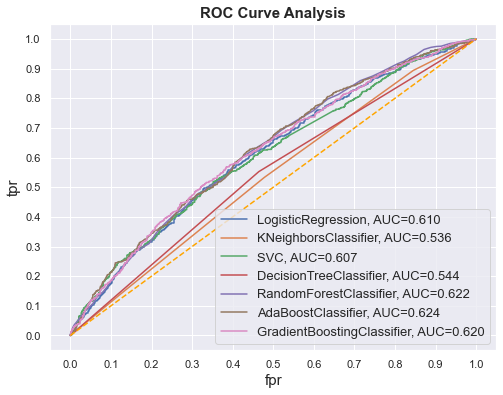

In [48]:
plot_ROC(result_table)

**The pipeline can also be used in grid search** to find the best performing parameters. To do this, let's first create a parameter grid for the chosen model.

*One important thing to note is that there is a need to append the name given to the classifier part of the pipeline to each parameter name. In the code above its name is ‘classifier’ so 'classifier__' has been added to each parameter.*

Next a grid search object has been created, which includes the original pipeline. When fit is called, the transformations are applied to the data, before a cross-validated grid-search is performed over the parameter grid.

In [30]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [31]:
%%time

# State the model:

from sklearn.ensemble import RandomForestClassifier

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(random_state=0))])

clf.fit(X_train, y_train)


# GridSearch the hyperparameters of the model:

param_grid = { 
    'classifier__n_estimators': [200, 500],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'classifier__max_depth' : [4, 5, 6, 7, 8],
    'classifier__criterion' :['gini', 'entropy']}

from sklearn.model_selection import GridSearchCV

scoring = {'AUC': 'roc_auc', 'F1': 'f1', 'Precision': 'precision',
           'Recall': 'recall', 'Accuracy': 'accuracy'}

CV_rf = GridSearchCV(clf, param_grid, n_jobs= 1, scoring=scoring, refit='F1')
# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``CV.best_estimator_`` along with
# parameters like ``CV.best_score_``, ``CV.best_params_`` and
# ``CV.best_index_``

CV_rf.fit(X_train, y_train)  
print(CV_rf.best_params_)    
print(CV_rf.best_score_)
CV_rf_scores = pd.DataFrame(CV_rf.cv_results_)

# {'classifier__criterion': 'entropy', 'classifier__max_depth': 4, 'classifier__max_features': 'auto', 'classifier__n_estimators': 500}
# 0.6353221704320445
# Wall time: 7min 19s

{'classifier__criterion': 'entropy', 'classifier__max_depth': 4, 'classifier__max_features': 'auto', 'classifier__n_estimators': 500}
0.6353221704320445
Wall time: 7min 19s


In [33]:
CV_rf_scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__max_depth,param_classifier__max_features,param_classifier__n_estimators,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_test_F1,split1_test_F1,split2_test_F1,split3_test_F1,split4_test_F1,mean_test_F1,std_test_F1,rank_test_F1,split0_test_Precision,split1_test_Precision,split2_test_Precision,split3_test_Precision,split4_test_Precision,mean_test_Precision,std_test_Precision,rank_test_Precision,split0_test_Recall,split1_test_Recall,split2_test_Recall,split3_test_Recall,split4_test_Recall,mean_test_Recall,std_test_Recall,rank_test_Recall,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,split3_test_Accuracy,split4_test_Accuracy,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy
0,0.650201,0.012604,0.148506,0.016241,gini,4,auto,200,"{'classifier__criterion': 'gini', 'classifier_...",0.608964,0.625602,0.620668,0.622642,0.625531,0.620681,0.006146,57,0.627868,0.635710,0.630508,0.638368,0.633094,0.633110,0.003706,11,0.569543,0.571003,0.576446,0.572700,0.569721,0.571883,0.002546,55,0.699501,0.716958,0.695761,0.721046,0.712329,0.709119,0.009848,5,0.584375,0.588125,0.591250,0.590000,0.585625,0.587875,0.002580,54
1,1.490479,0.073718,0.278028,0.003653,gini,4,auto,500,"{'classifier__criterion': 'gini', 'classifier_...",0.610790,0.626645,0.621552,0.621501,0.629018,0.621901,0.006275,50,0.625212,0.640443,0.619798,0.636261,0.647411,0.633825,0.010053,8,0.571872,0.576271,0.564549,0.580678,0.575581,0.573790,0.005402,48,0.689526,0.720698,0.687032,0.703611,0.739726,0.708119,0.019839,7,0.585625,0.594375,0.577500,0.596250,0.595625,0.589875,0.007282,37
2,0.659392,0.007751,0.138514,0.004221,gini,4,sqrt,200,"{'classifier__criterion': 'gini', 'classifier_...",0.608964,0.625602,0.620668,0.622642,0.625531,0.620681,0.006146,57,0.627868,0.635710,0.630508,0.638368,0.633094,0.633110,0.003706,11,0.569543,0.571003,0.576446,0.572700,0.569721,0.571883,0.002546,55,0.699501,0.716958,0.695761,0.721046,0.712329,0.709119,0.009848,5,0.584375,0.588125,0.591250,0.590000,0.585625,0.587875,0.002580,54
3,1.468093,0.012845,0.278627,0.006428,gini,4,sqrt,500,"{'classifier__criterion': 'gini', 'classifier_...",0.610790,0.626645,0.621552,0.621501,0.629018,0.621901,0.006275,50,0.625212,0.640443,0.619798,0.636261,0.647411,0.633825,0.010053,8,0.571872,0.576271,0.564549,0.580678,0.575581,0.573790,0.005402,48,0.689526,0.720698,0.687032,0.703611,0.739726,0.708119,0.019839,7,0.585625,0.594375,0.577500,0.596250,0.595625,0.589875,0.007282,37
4,0.589836,0.003867,0.141312,0.008424,gini,4,log2,200,"{'classifier__criterion': 'gini', 'classifier_...",0.617480,0.619557,0.625615,0.616488,0.640990,0.624026,0.009055,39,0.618497,0.635334,0.643897,0.620690,0.651290,0.633942,0.012776,7,0.576509,0.581950,0.584350,0.568323,0.582515,0.578729,0.005823,17,0.667082,0.699501,0.716958,0.683686,0.738481,0.701142,0.024947,16,0.587500,0.597500,0.602500,0.580625,0.603125,0.594250,0.008816,11
5,1.388542,0.048758,0.291819,0.033998,gini,4,log2,500,"{'classifier__criterion': 'gini', 'classifier_...",0.618684,0.626293,0.631757,0.620534,0.642975,0.628049,0.008761,14,0.632411,0.630865,0.635641,0.628278,0.647124,0.634864,0.006577,3,0.577915,0.577042,0.583333,0.579390,0.582090,0.579954,0.002405,13,0.698254,0.695761,0.698254,0.686177,0.728518,0.701393,0.014274,15,0.593125,0.591875,0.598750,0.592500,0.601250,0.595500,0.003779,9
6,0.724752,0.059068,0.144111,0.001469,gini,5,auto,200,"{'classifier__criterion': 'gini', 'classifier_...",0.609775,0.631084,0.622938,0.618051,0.630126,0.622395,0.007921,48,0.623025,0.636821,0.620690,0.629921,0.641196,0.630331,0.007832,23,0.569072,0.577665,0.567735,0.574359,0.577268,0.573220,0.004117,50,0.688279,0.709476,0.684539,0.697385,0.721046,0.700145,0.013534,19,0.582500,0.594375,0.580625,0.588750,0.595000,0.588250,0.005908,50
7,1.545046,0.018674,0.295616,0.021625,gini,5,auto,500,"{'classif

In [34]:
%%time

# State the model:

from sklearn.ensemble import GradientBoostingClassifier

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', GradientBoostingClassifier(random_state=0))])

clf.fit(X_train, y_train)


# GridSearch the hyperparameters of the model:

param_grid = { 
    'classifier__loss': ['deviance'],
    'classifier__learning_rate': [.1, .2, .3],
    'classifier__n_estimators' : [100, 200, 300],
    'classifier__criterion' : ['mse'],
    'classifier__max_depth' : [3, 4, 5]
}

from sklearn.model_selection import GridSearchCV

scoring = {'AUC': 'roc_auc', 'F1': 'f1', 'Precision': 'precision',
           'Recall': 'recall', 'Accuracy': 'accuracy'}

CV_gb = GridSearchCV(clf, param_grid, n_jobs= 1, scoring=scoring, refit='F1')
# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``CV.best_estimator_`` along with
# parameters like ``CV.best_score_``, ``CV.best_params_`` and
# ``CV.best_index_``

CV_gb.fit(X_train, y_train)  
print(CV_gb.best_params_)    
print(CV_gb.best_score_)
CV_gb_scores = pd.DataFrame(CV_gb.cv_results_)

# {'classifier__criterion': 'mse', 'classifier__learning_rate': 0.1, 'classifier__loss': 'deviance', 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
# 0.6097297211201359
# Wall time: 6min 6s

{'classifier__criterion': 'mse', 'classifier__learning_rate': 0.1, 'classifier__loss': 'deviance', 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
0.6097297211201359
Wall time: 6min 6s


In [35]:
CV_gb_scores[CV_gb_scores['rank_test_F1'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__criterion,param_classifier__learning_rate,param_classifier__loss,param_classifier__max_depth,param_classifier__n_estimators,params,split0_test_AUC,split1_test_AUC,split2_test_AUC,split3_test_AUC,split4_test_AUC,mean_test_AUC,std_test_AUC,rank_test_AUC,split0_test_F1,split1_test_F1,split2_test_F1,split3_test_F1,split4_test_F1,mean_test_F1,std_test_F1,rank_test_F1,split0_test_Precision,split1_test_Precision,split2_test_Precision,split3_test_Precision,split4_test_Precision,mean_test_Precision,std_test_Precision,rank_test_Precision,split0_test_Recall,split1_test_Recall,split2_test_Recall,split3_test_Recall,split4_test_Recall,mean_test_Recall,std_test_Recall,rank_test_Recall,split0_test_Accuracy,split1_test_Accuracy,split2_test_Accuracy,split3_test_Accuracy,split4_test_Accuracy,mean_test_Accuracy,std_test_Accuracy,rank_test_Accuracy
0,1.36096,0.141959,0.065158,0.013341,mse,0.1,deviance,3,100,"{'classifier__criterion': 'mse', 'classifier__...",0.617971,0.628296,0.624315,0.613496,0.622392,0.621294,0.005123,8,0.609569,0.606905,0.608132,0.608019,0.616024,0.60973,0.003259,1,0.579125,0.590106,0.576536,0.585253,0.588435,0.583891,0.005253,18,0.643392,0.624688,0.643392,0.632628,0.646326,0.638085,0.008167,1,0.586875,0.594375,0.584375,0.590625,0.595625,0.590375,0.004287,9


# Probar a implementar XGBoost!!!

# Probar a meter datos de meteo

### Validation

In [69]:
CV_rf_best = CV_rf.best_estimator_
CV_rf_best

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['TAXI_OUT_median', 'TAXI_IN_median', 'CRS_ELAPSED_TIME', 'DISTANCE'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ig

In [90]:
X_validation = df_validation.drop('ARR_DEL15', axis=1)
y_validation = df_validation['ARR_DEL15']


predictions = CV_rf_best.predict(X_validation)
probabilities = CV_rf_best.predict_proba(X_validation)

clf_metrics(CV_rf_best, y_test, predictions)

tpr, fpr, thresolds = roc_curve(y_validation, probabilities[::, 1])
auc = roc_auc_score(y_validation, probabilities[::,1])
plt.plot(tpr, fpr)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['TAXI_OUT_median', 'TAXI_IN_median', 'CRS_ELAPSED_TIME', 'DISTANCE'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ig

ValueError: Found input variables with inconsistent numbers of samples: [2000, 7258232]

### Feature Importance

In [77]:
sc = StandardScaler()
sc.fit_transform(X_train.select_dtypes('number'))

array([[ 1.47333274, -1.01458717,  0.09692757,  0.12292795],
       [-1.41092783, -0.26584889, -0.08719728, -0.03135361],
       [-1.67313334, -1.01458717, -0.08719728,  0.11772744],
       ...,
       [ 0.68671622,  1.23162768, -0.4837739 , -0.5635383 ],
       [ 1.73553825,  1.60599682,  0.16774483, -0.12842964],
       [ 0.42451072, -1.01458717,  0.53599454,  0.68458215]])

In [78]:
pd.DataFrame(StandardScaler().fit_transform(X_train.select_dtypes('number')))

,0,1,2,3
0,1.473333,-1.014587,0.096928,0.122928
1,-1.410928,-0.265849,-0.087197,-0.031354
2,-1.673133,-1.014587,-0.087197,0.117727
3,3.046566,-1.014587,-0.497937,-0.719553
4,0.162305,0.857259,-0.002217,0.206136
...,...,...,...,...
7995,-1.410928,-1.388956,-0.795370,-0.544470
7996,-0.099900,-0.640218,-1.021985,-1.225736
7997,0.686716,1.231628,-0.483774,-0.563538
7998,1.735538,1.605997,0.167745,-0.128430


In [86]:
enc = OneHotEncoder(dtype='int64')
enc.fit_transform(X_train.select_dtypes('category'))

<bound method OneHotEncoder.get_feature_names of OneHotEncoder(dtype='int64')>

In [89]:
a = pd.DataFrame([StandardScaler().fit_transform(X_train.select_dtypes('number')),
              OneHotEncoder(dtype='int64').fit_transform(X_train.select_dtypes('category'))])
a

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\internals\construction.py:305: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


,0
0,"[[1.4733327429300855, -1.0145871717832002, 0.0..."
1,"(0, 2)\t1\n (0, 30)\t1\n (0, 44)\t1\n (0,..."


In [70]:
from sklearn.linear_model import LogisticRegression
# define dataset
X = a
# define the model
model = LogisticRegression(solver='sag', max_iter=1000, random_state=0)
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)

ValueError: could not convert string to float: 'AA'

___

In [41]:
t1 = time.perf_counter() - t0
print("Time elapsed: ", t1) # CPU seconds elapsed (floating point)

Time elapsed:  3213.8025687


___

### Which metric should be used then?
##### Bear in mind that it's a clear case of imbalanced data

Nomenclature:
- Delayed = Positive
- On-time = Negative 

Considering this:
- False positive (Type I error) → Wrongly classifying an On-time flight as a Delayed flight → Not significantly relevant
- **False negative (Type II error) → Wrongly classifying a Delayed flight as an On-time flight → Highly relevant**

**F-beta** score (\$ F_\beta \$):
![F-beta score](https://wikimedia.org/api/rest_v1/media/math/render/svg/136f45612c08805f4254f63d2f2524bc25075fff)

Two commonly used values for β are:
- **2 : weighs recall higher than precision**
- 0.5 : weighs recall lower than precision.


<em>Probably most people in the industry would accept that an **OTP of 80%* or above is pretty good***. That’s 4 in 5 flights arriving within 15 minutes of their scheduled arrival time. The very best airlines and airports succeed in punctuality closer to 90% - but they remain the exception rather than the rule.</em>  
(Source: [OAG](https://www.oag.com/on-time-performance-airlines-airports))

The actual data from the 7268232 records comprising the OTP dataset accurately confirm this hypothesis:
```
Delays: 5878979 (80.89%)
On-time: 1389253 (19.11%)
```

In some rare cases, the calculation of Precision or Recall can cause a division by 0. Regarding the precision, this can happen if there are no results inside the answer of an annotator and, thus, the true as well as the false positives are 0. For these special cases, we have defined that **if the true positives, false positives and false negatives are all 0, the precision, recall and F1-measure are 1**. This might occur in cases in which the gold standard contains a document without any annotations and the annotator (correctly) returns no annotations. **If true positives are 0 and one of the two other counters is larger than 0, the precision, recall and F1-measure are 0.**

___